# Preprocessing the score data

In [1]:
# Import packages
import os
import pickle
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from tqdm.notebook import tqdm, trange

# Define all paths that are necessary
DPATH = "../data/"
CDPATH = "../data/condition/"
CNPATH = "../data/control/"

# Get all the files that are present in the directories
condn_files = os.listdir(CDPATH)
cntlr_files = os.listdir(CNPATH)

# Plotting settings
# In case the font Cambria is not locally installed in you system, 
# comment out the line below
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10,6

## 1. Read the Data

In [2]:
# Load the data
df_score = pd.read_csv(DPATH+"scores.csv")
display(df_score)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


Information about the dataset:
1. number: patient identifier
2. days: number of days of measurements
3. gender:
    - 1: female
    - 2: male
4. age: age in age groups
5. afftype: 
    - 1: bipolar II, 
    - 2: unipolar depressive, 
    - 3: bipolar I
6. melanch: 
    - 1: melancholia, 
    - 2: no melancholia
7. inpatient: 
    - 1: inpatient, 
    - 2: outpatient
8. edu: education grouped in years
9. marriage: 
    - 1: married or cohabiting, 
    - 2: single
10. work: 
    - 1: working or studying, 
    - 2: unemployed/sick leave/pension
11. madrs1: MADRS score when measurement started
12. madrs2: MADRS when measurement stopped

In [3]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [4]:
df_score.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,55.000000,55.000000,23.000000,20.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.600000,1.454545,1.739130,1.950000,1.782609,1.521739,1.869565,22.739130,20.000000
std,2.491467,0.502519,0.540824,0.223607,0.421741,0.510754,0.344350,4.797892,4.729021
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,18.500000,16.000000
50%,13.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,21.000000
75%,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000,24.500000
max,20.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


## 2. Preprocessing

In [5]:
# Define a flag that indicates whether the participant is depressed
df_score["depressed"] = df_score["number"].str.startswith("condition")
df_score["edu"].replace(" ", np.NaN, inplace=True)

# Converting columns to the right datatype

# Categorical columns
categorical_columns = ["gender", "age", "afftype", "melanch", "inpatient", "edu", "marriage", "work", "depressed"]
df_score[categorical_columns] = df_score[categorical_columns].astype("category")

# MADRS columns
madrs_cols = [i for i in df_score.columns if i.startswith("madrs")]
# The columns cannot be converted to int when there are NaNs
df_score[madrs_cols] = df_score[madrs_cols].fillna(0)
df_score[madrs_cols] = df_score[madrs_cols].astype("int")

In [6]:
df_score["Delta madrs"] = df_score["madrs2"] - df_score["madrs1"]
df_score["Avg madrs"] = (df_score["madrs2"] + df_score["madrs1"])//2
display(df_score.head())
print("Mean change in MADRS score:", df_score["Delta madrs"].mean())

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,depressed,Delta madrs,Avg madrs
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19,19,True,0,19
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24,11,True,-13,17
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24,25,True,1,24
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20,16,True,-4,18
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26,26,True,0,26


Mean change in MADRS score: -1.1454545454545455


The mean of the change in MADRS scores (after - before) is negative, which is good. Because, greater the MADRS score, higher the level of depressions.

In [7]:
# Separate the condition and control samples
df_score_cond = df_score[df_score["number"].str.startswith("condition")].copy()
df_score_cntrl = df_score[df_score["number"].str.startswith("control")].copy()

print("Condition dataframe; Top 5 rows; Full dataframe size:", df_score_cond.shape)
display(df_score_cond.head())
print("Control dataframe; Top 5 rows; Full dataframe size:", df_score_cntrl.shape)
display(df_score_cntrl.head())

Condition dataframe; Top 5 rows; Full dataframe size: (23, 15)


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,depressed,Delta madrs,Avg madrs
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19,19,True,0,19
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24,11,True,-13,17
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24,25,True,1,24
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20,16,True,-4,18
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26,26,True,0,26


Control dataframe; Top 5 rows; Full dataframe size: (32, 15)


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,depressed,Delta madrs,Avg madrs
23,control_1,8,2,25-29,NaN,NaN,NaN,NaN,NaN,NaN,0,0,False,0,0
24,control_2,20,1,30-34,NaN,NaN,NaN,NaN,NaN,NaN,0,0,False,0,0
25,control_3,12,2,30-34,NaN,NaN,NaN,NaN,NaN,NaN,0,0,False,0,0
26,control_4,13,1,25-29,NaN,NaN,NaN,NaN,NaN,NaN,0,0,False,0,0
27,control_5,13,1,30-34,NaN,NaN,NaN,NaN,NaN,NaN,0,0,False,0,0


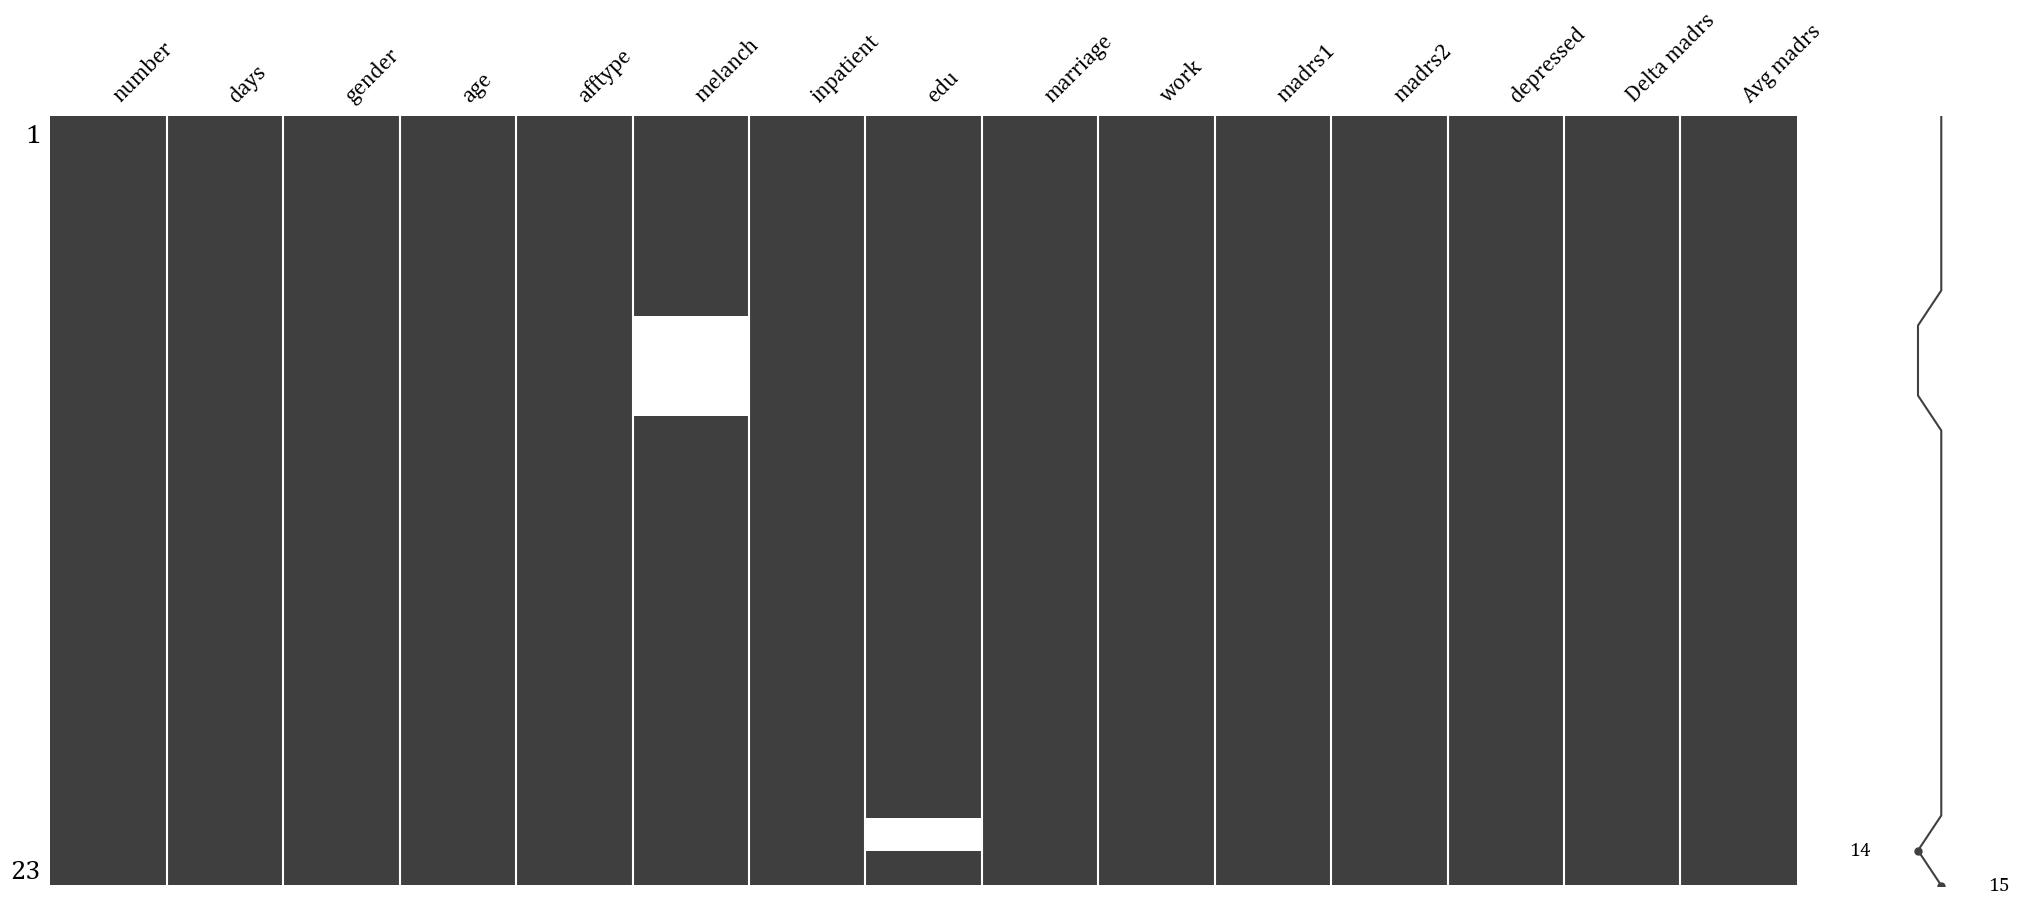

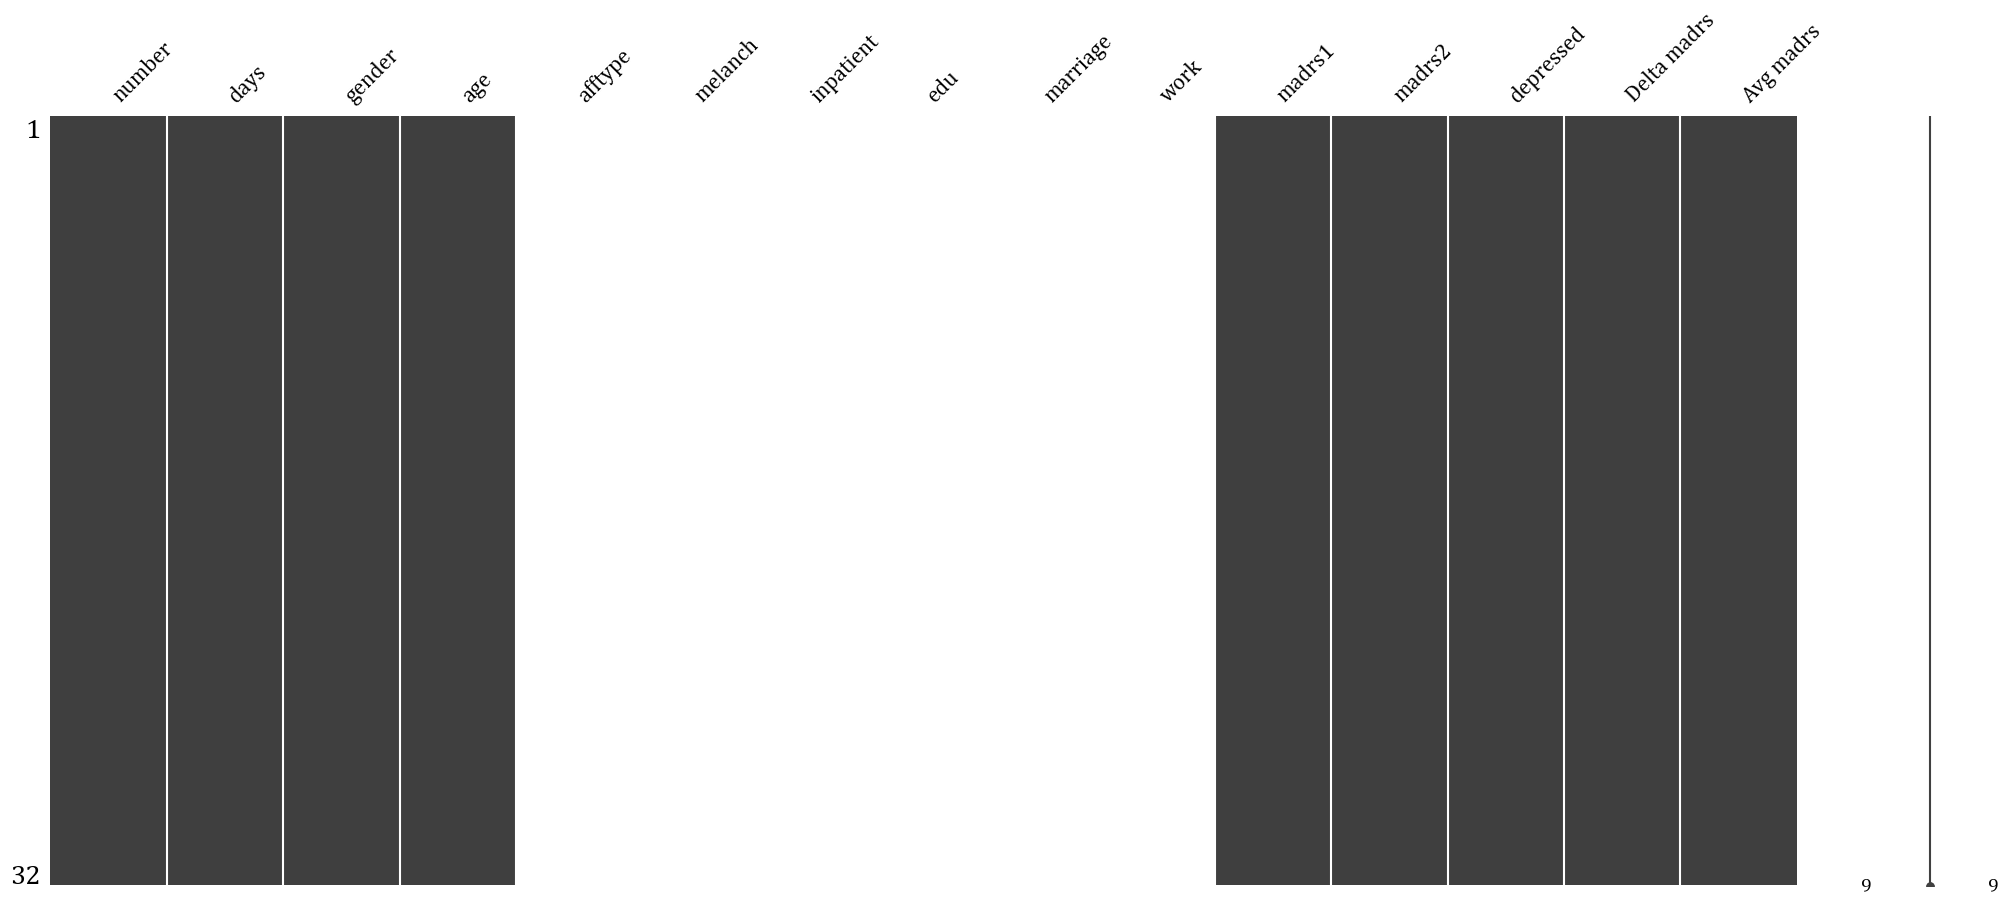

In [8]:
# Visualize missing values in the dataset
missingno.matrix(df_score_cond)
plt.show()
missingno.matrix(df_score_cntrl)
plt.show()

## 3. Data Imputation

In [9]:
# Setting the values in control dataset first
df_score_cntrl[["afftype", "melanch", "inpatient", "edu", "marriage", "work"]] = 0

In [10]:
# Condition dataframe
# Converting edu and age column into integer classes for ease of imputation
df_score_cond["edu"] = pd.factorize(df_score_cond["edu"], sort=True)[0]
df_score_cond["edu"].replace(3, np.NaN, inplace=True)
df_score_cond["age"] = pd.factorize(df_score_cond["age"], sort=True)[0]

# Converting the remaining columns into int
df_score_cond["afftype"] = df_score_cond["afftype"].astype(int)
df_score_cond["inpatient"] = df_score_cond["inpatient"].astype(int)
df_score_cond["work"] = df_score_cond["work"].astype(int)
df_score_cond["marriage"] = df_score_cond["marriage"].astype(int)

df_score_cond

/Users/sowmyamanojna/Library/Python/3.9/lib/python/site-packages/pandas/core/arrays/categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,depressed,Delta madrs,Avg madrs
0,condition_1,11,2,3,2,2.0,2,2,1,2,19,19,True,0,19
1,condition_2,18,2,4,1,2.0,2,2,2,2,24,11,True,-13,17
2,condition_3,13,1,5,2,2.0,2,2,2,2,24,25,True,1,24
3,condition_4,13,2,1,2,2.0,2,0,1,1,20,16,True,-4,18
4,condition_5,13,2,6,2,2.0,2,0,2,2,26,26,True,0,26
5,condition_6,7,1,3,2,2.0,2,2,1,2,18,15,True,-3,16
6,condition_7,11,1,0,1,NaN,2,0,2,1,24,25,True,1,24
7,condition_8,5,2,1,2,NaN,2,0,1,2,20,16,True,-4,18
8,condition_9,13,2,5,1,NaN,2,2,1,2,26,26,True,0,26
9,condition_10,9,2,5,2,2.0,2,2,1,2,28,21,True,-7,24


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,depressed,Delta madrs,Avg madrs
0,condition_1,11,2,3,2,2,2,2,1,2,19,19,1,0,19
1,condition_2,18,2,4,1,2,2,2,2,2,24,11,1,-13,17
2,condition_3,13,1,5,2,2,2,2,2,2,24,25,1,1,24
3,condition_4,13,2,1,2,2,2,0,1,1,20,16,1,-4,18
4,condition_5,13,2,6,2,2,2,0,2,2,26,26,1,0,26
5,condition_6,7,1,3,2,2,2,2,1,2,18,15,1,-3,16
6,condition_7,11,1,0,1,1,2,0,2,1,24,25,1,1,24
7,condition_8,5,2,1,2,2,2,0,1,2,20,16,1,-4,18
8,condition_9,13,2,5,1,1,2,2,1,2,26,26,1,0,26
9,condition_10,9,2,5,2,2,2,2,1,2,28,21,1,-7,24


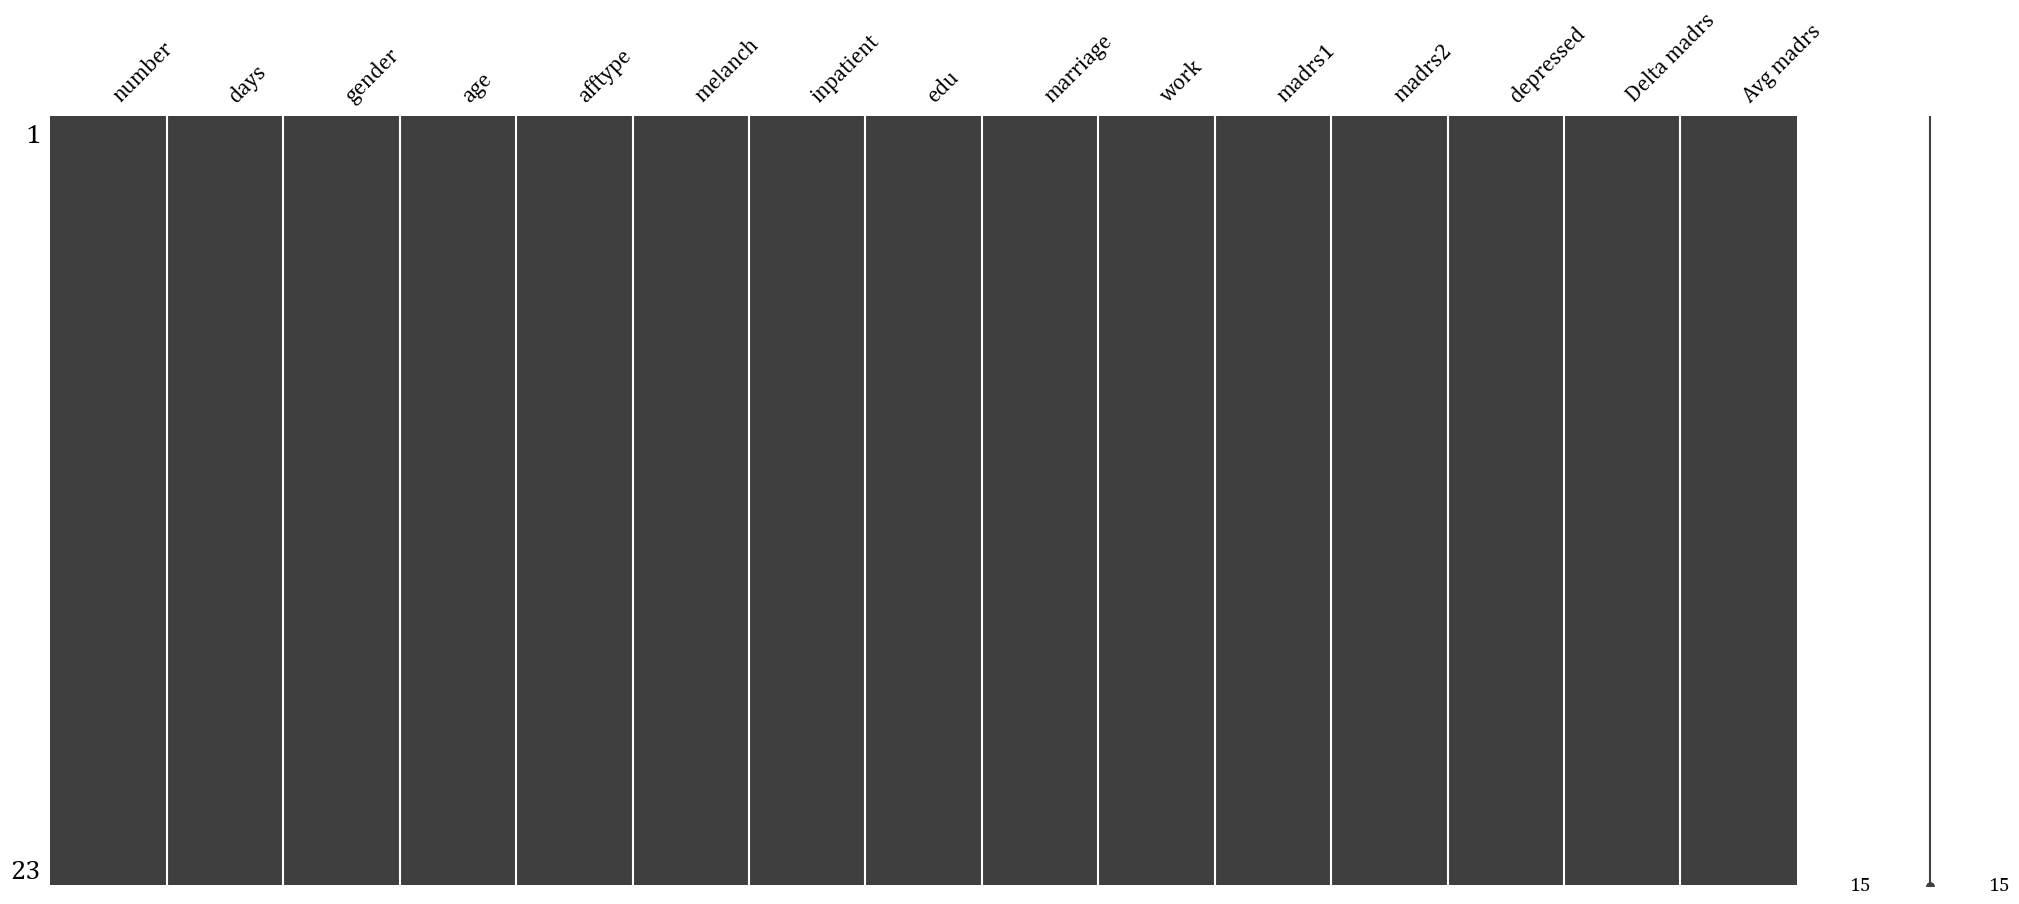

In [11]:
# Imputing data for the "edu" and "melanch" columns
columns_of_interest = [i for i in df_score_cond.columns if i!="number"]

imputer = KNNImputer(weights="distance")
df_score_cond[columns_of_interest] = imputer.fit_transform(df_score_cond[columns_of_interest]).astype(int)
display(df_score_cond)

# Plot the matrix to see status of missing data 
missingno.matrix(df_score_cond)
plt.show()

In [12]:
# Save the cleaned dataframes
df_score_cond.to_csv(DPATH+"clean_cond_score.csv")
df_score_cntrl.to_csv(DPATH+"clean_cntrl_score.csv")

In [13]:
df_final_score = pd.concat([df_score_cond, df_score_cntrl])
df_final_score["age"] = pd.factorize(df_final_score["age"], sort=True)[0]
df_final_score.to_csv(DPATH+"scores_final.csv")
df_final_score

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,depressed,Delta madrs,Avg madrs
0,condition_1,11,2,3,2,2,2,2,1,2,19,19,1,0,19
1,condition_2,18,2,4,1,2,2,2,2,2,24,11,1,-13,17
2,condition_3,13,1,5,2,2,2,2,2,2,24,25,1,1,24
3,condition_4,13,2,1,2,2,2,0,1,1,20,16,1,-4,18
4,condition_5,13,2,6,2,2,2,0,2,2,26,26,1,0,26
5,condition_6,7,1,3,2,2,2,2,1,2,18,15,1,-3,16
6,condition_7,11,1,0,1,1,2,0,2,1,24,25,1,1,24
7,condition_8,5,2,1,2,2,2,0,1,2,20,16,1,-4,18
8,condition_9,13,2,5,1,1,2,2,1,2,26,26,1,0,26
9,condition_10,9,2,5,2,2,2,2,1,2,28,21,1,-7,24


## 4. Plots

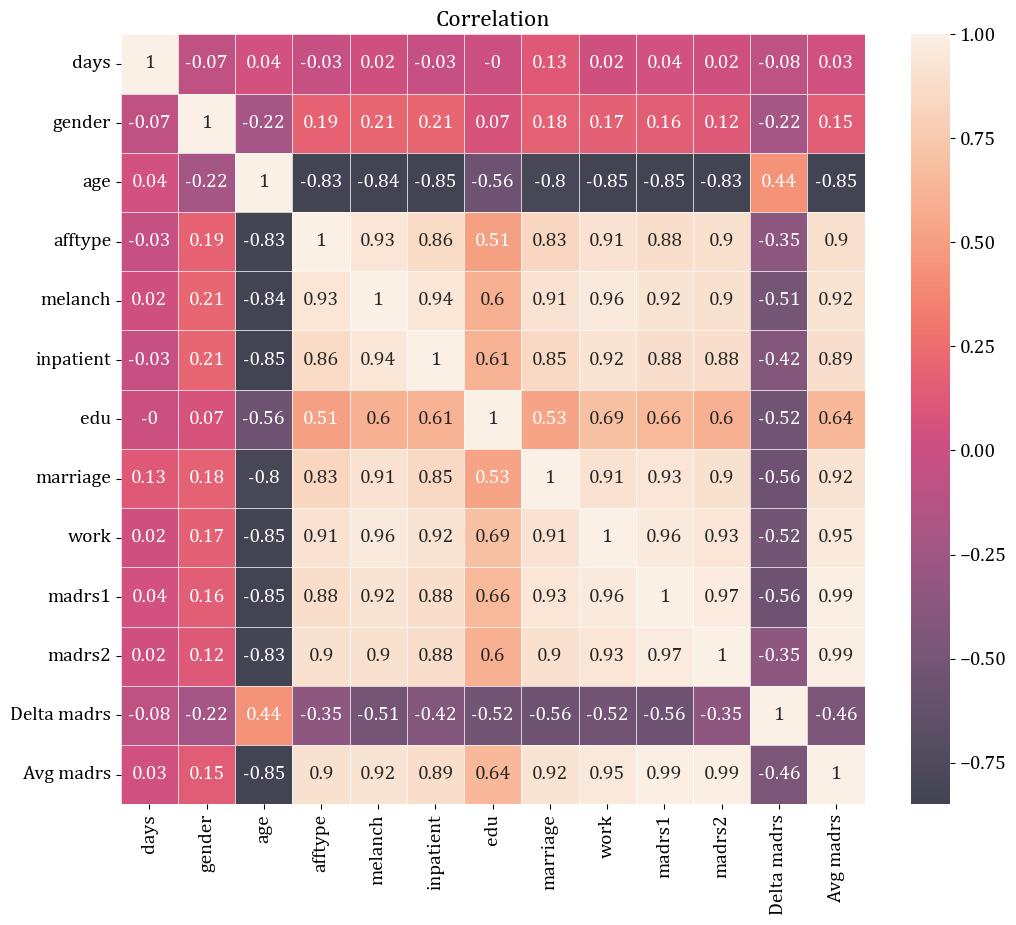

In [14]:
plt.figure(figsize=[12,10])
plt.title("Correlation")
sns.heatmap(df_final_score[columns_of_interest].corr().round(2), linewidths=.5, annot=True, alpha=0.75)
plt.grid(False)
plt.show()

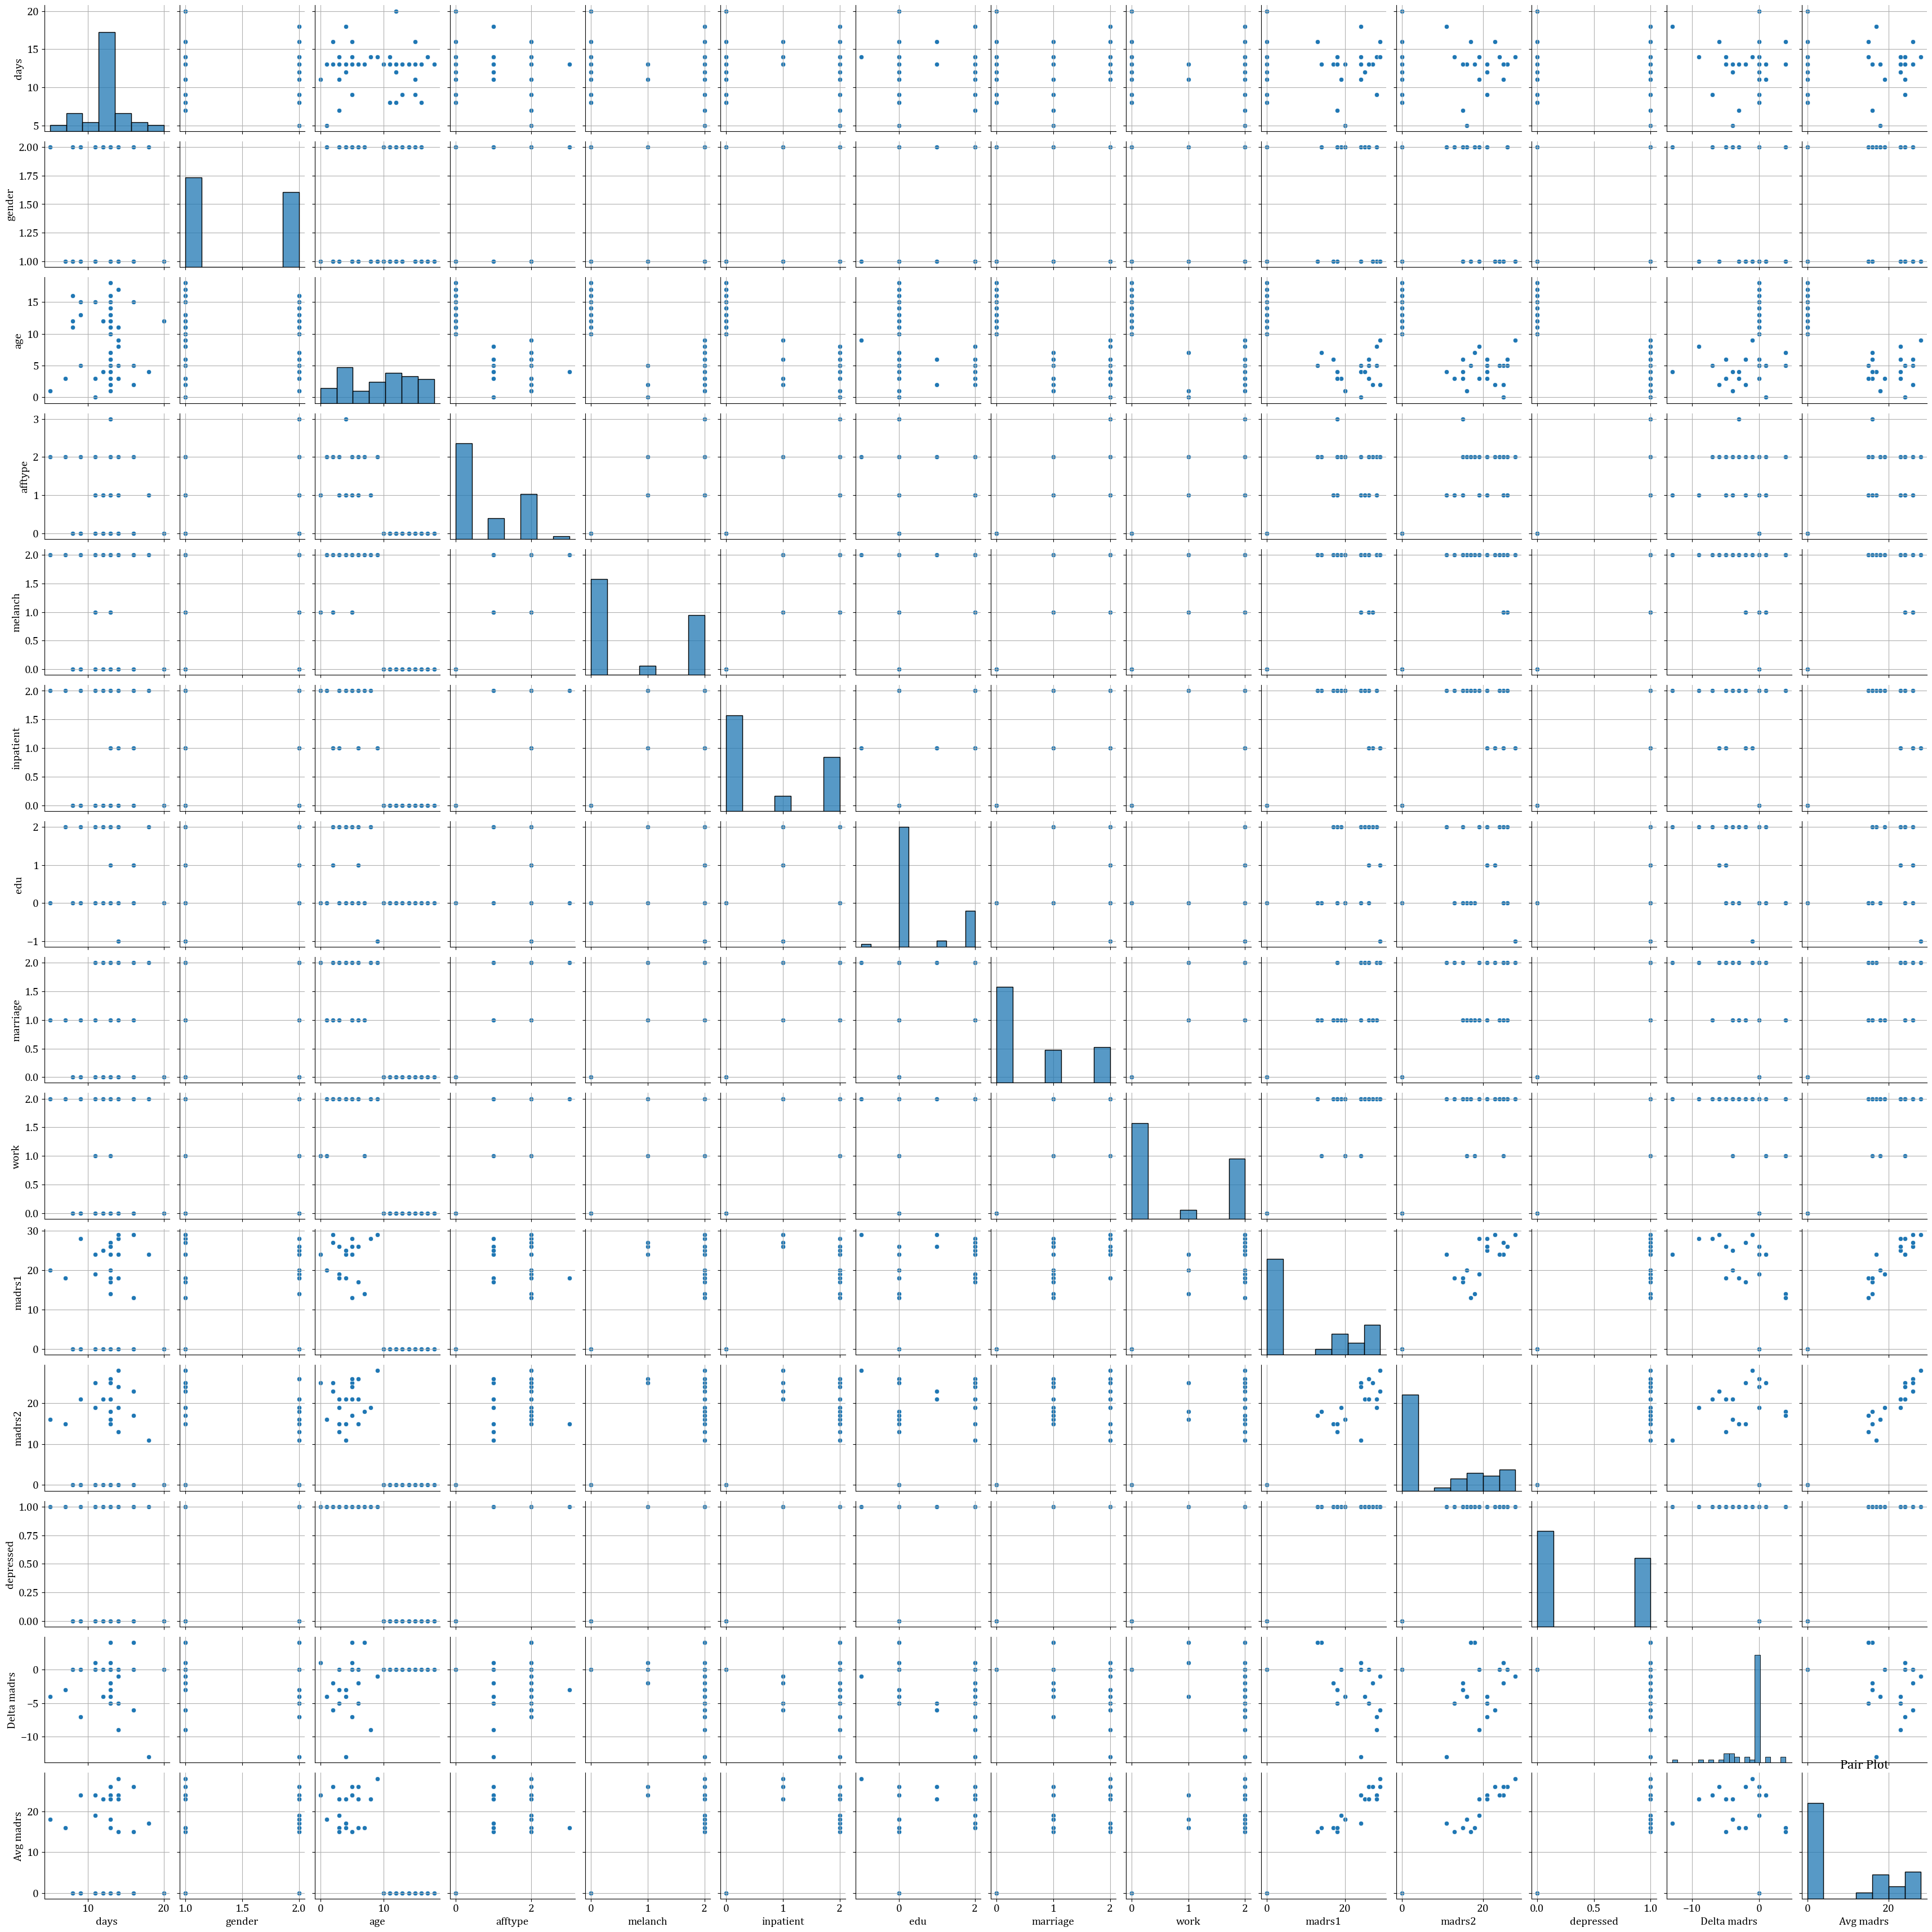

In [15]:
# Pair plotss
sns.pairplot(df_final_score[columns_of_interest])
plt.title("Pair Plot")
plt.show()

In [48]:
corr_matrix = df_final_score[columns_of_interest].corr()
pos = np.where((np.abs(df_final_score[columns_of_interest].corr()) > 0.9) & (np.abs(df_final_score[columns_of_interest].corr()) != 1))

columns = corr_matrix.columns
index = corr_matrix.index

df_corr = pd.DataFrame()
for i in range(pos[0].size):
    idx = index[pos[0][i]]
    col = columns[pos[1][i]]
    
    info = {"corr": corr_matrix.loc[idx][col], "var1": idx, "var2": col}
    if i != 0:
        # Ensures no duplicate entries
        if np.any((info["var1"] == df_corr["var2"]) & (info["var2"] == df_corr["var1"])):
            pass
        else:
            df_corr = df_corr.append(info, ignore_index=True)
    else:
        df_corr = df_corr.append(info, ignore_index=True)
    
df_corr.sort_values("corr", inplace=True, ascending=False)
df_corr

,corr,var1,var2
16,0.993256,madrs1,Avg madrs
17,0.993146,madrs2,Avg madrs
15,0.973260,madrs1,madrs2
4,0.959499,melanch,work
12,0.956328,work,madrs1
14,0.951018,work,Avg madrs
2,0.938584,melanch,inpatient
13,0.933227,work,madrs2
10,0.932882,marriage,madrs1
0,0.929309,afftype,melanch


Observations:
- Work and (melanch, all madrs scores) are highly positively correlated. This is insteresting because higher values of work (2), indicates that the participant is unemployed/on a sick leave/receives pension. Hence, teh correlation indicates that people who are unemployed/on a sick leave/receive pension, tend to be more depressed.
- Marriage and (melanch, all madrs scores) are highly positively correlated. A higher value of marriage (2) indicates that the participant is single. Hence, the correlaiton idicates that single people tend to be more depressed. 